In [1]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer
# Decision Tree for Financial Loam EMI default detection

## Import the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Read the Data from the CSV

In [3]:
pd.set_option('display.max_columns', 50)
my_data = pd.read_csv("HR_Employee_Attrition_Data.csv",na_values =['NA'])
my_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Pre-Processing

In [5]:
columns_name = temp.split(';')
data = dummy_df.values
data

array([[59, 'admin.', 'married', ..., 0, 'unknown', 'yes'],
       [56, 'admin.', 'married', ..., 0, 'unknown', 'yes'],
       [41, 'technician', 'married', ..., 0, 'unknown', 'yes'],
       ...,
       [32, 'technician', 'single', ..., 0, 'unknown', 'no'],
       [43, 'technician', 'married', ..., 5, 'failure', 'no'],
       [34, 'technician', 'married', ..., 0, 'unknown', 'no']],
      dtype=object)

In [6]:
contacts = list()
for element in data:
    contact = element[8].split(';')
    contacts.append(contact)

contact_df = pd.DataFrame(contacts,columns = columns_name)

In [16]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df["job"] = le.fit_transform(res_df["job"])
    res_df["marital"] = le.fit_transform(res_df["marital"])
    res_df["education"] = le.fit_transform(res_df["education"])
    res_df["housing"] = le.fit_transform(res_df["housing"])
    res_df["month"] = le.fit_transform(res_df["month"])
    res_df["loan"] = le.fit_transform(res_df["loan"])
    res_df["contact"] = le.fit_transform(res_df["contact"])
    res_df["day_of_week"] = le.fit_transform(res_df["day"])
    res_df["poutcome"] = le.fit_transform(res_df["poutcome"])
    res_df["default"] = le.fit_transform(res_df["default"])
    res_df["deposit"] = le.fit_transform(res_df["deposit"])
    
    #res_df["y"] = le.fit_transform(res_df["y"])
    return res_df

In [17]:
encoded_df = preprocessor(dummy_df)

x = encoded_df.drop(["default"],axis =1).values
y = encoded_df["default"].values

print(x)

[[59  0  1 ...  3  1  4]
 [56  0  1 ...  3  1  4]
 [41  9  1 ...  3  1  4]
 ...
 [32  9  2 ...  3  0 18]
 [43  9  1 ...  0  0  7]
 [34  9  1 ...  3  0  8]]


## Split the data into Train-Test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [19]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9855526934707134
Testing score:  0.9834303627407076


In [20]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.9858886773434875
Testing score:  0.9829825347066726


In [21]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)


Training score:  0.9902564676895509
Testing score:  0.9798477384684281


In [22]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

## Graphical Representation of Tree

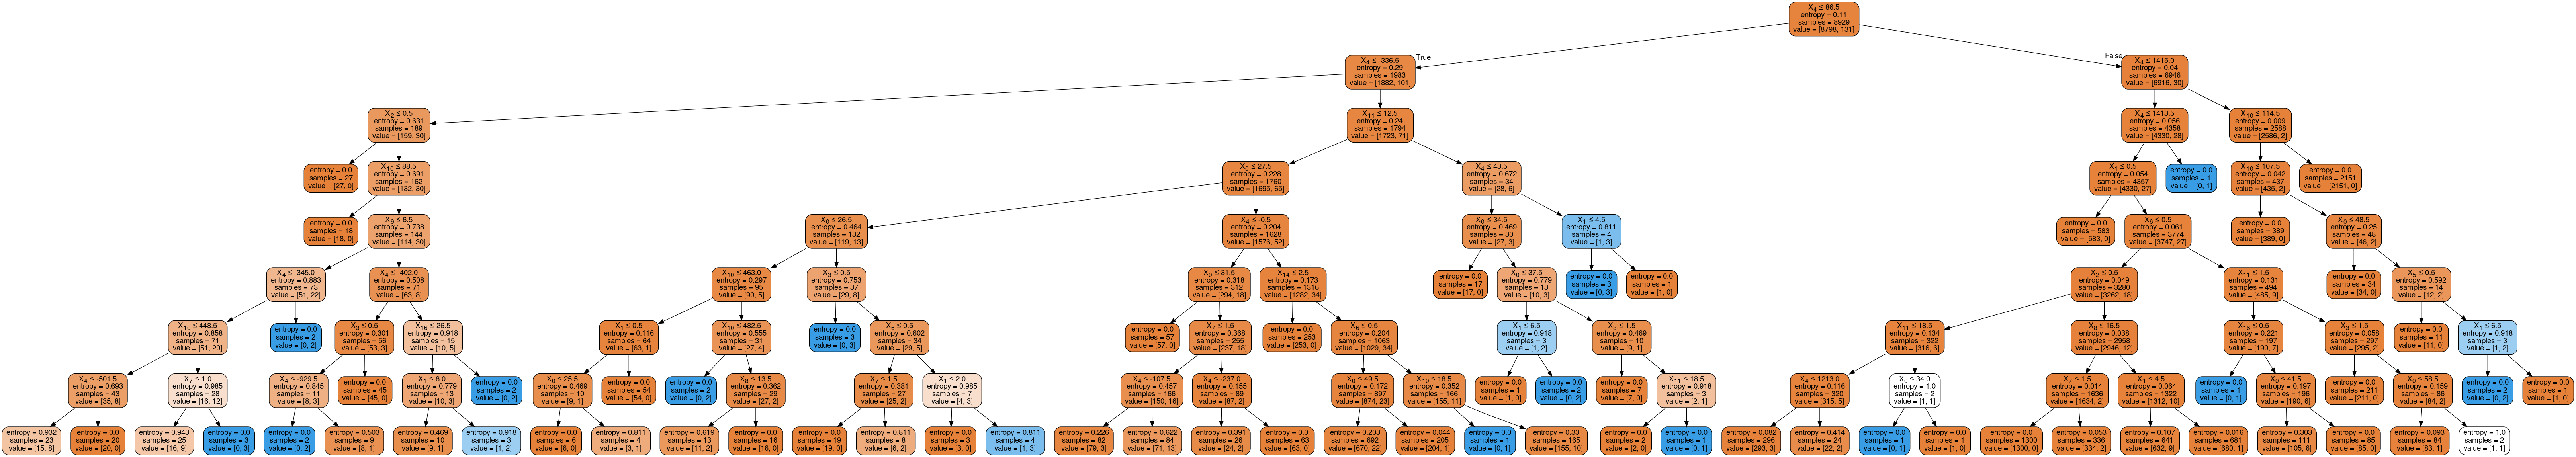

<Figure size 432x432 with 0 Axes>

In [23]:

plt.figure(figsize=(6,6))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Performance Metrics

In [24]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [25]:
predictions = model_dt.predict(x_test)

# Model Accuracy
print (model_dt.score(x_test, y_test))
y_actual_result = y_test[0]

0.9793999104343932


In [26]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

## Recall

In [27]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.08333333333333333


## Area Under the Curve

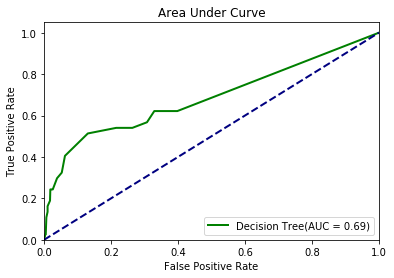

In [28]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [29]:
print (confusion_matrix(y_test, predictions))

[[2186   10]
 [  36    1]]


In [30]:
accuracy_score(y_test, predictions)

0.9793999104343932

In [31]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

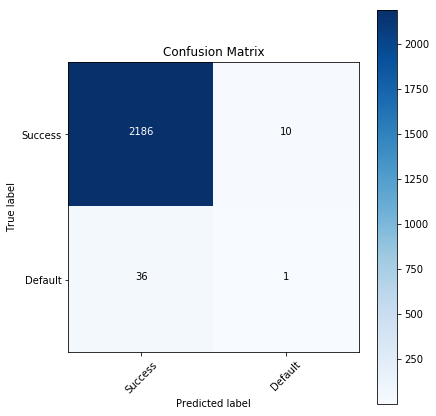

In [32]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Pruning of the tree

In [33]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(model_dt.tree_.children_left < 0))
# start pruning from the root
prune_index(model_dt.tree_, 0, 5)
sum(model_dt.tree_.children_left < 0)

#It means that the code has created 17 new leaf nodes 
#(by practically removing links to their ancestors). The tree, which has looked before like

64


77

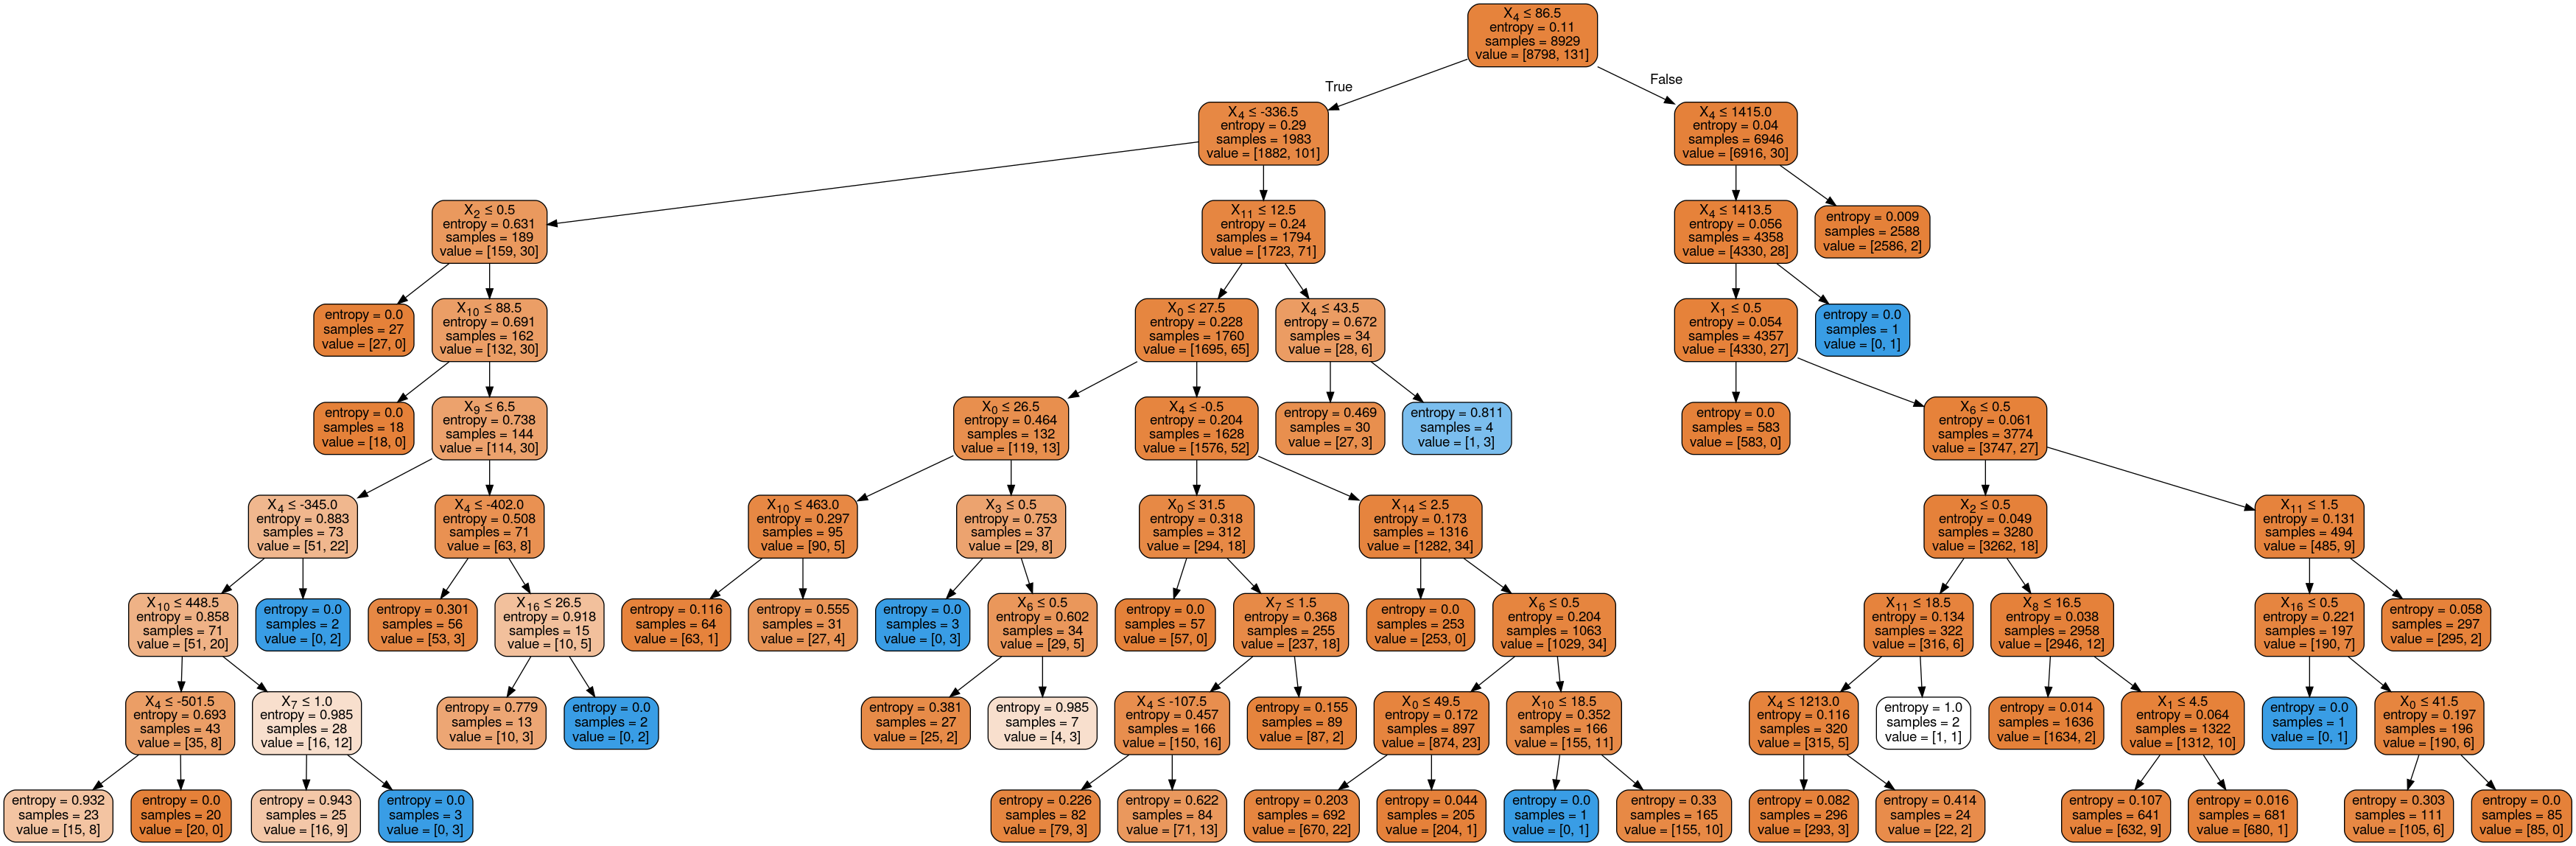

<Figure size 432x432 with 0 Axes>

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
plt.figure(figsize=(6,6))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
